##  Odds & Distribution Analysis

    It's a python script for analysing a given stock based on it's distribution of returns
    
    Note: The data is taken from yahoo finance, Timezone: Asia/Kolkata (IST)

In [113]:
import datetime, time, pytz
from pytz import timezone, all_timezones
import pandas as pd
import requests
import json
import csv 
import sys
import os
%matplotlib inline

Enter your timezone: Asia/Kolkata
Enter stock name as per yahoo finance: ^NSEI
Enter starting date in DD/MM/YYYY format: 01/01/2021
Enter end date in DD/MM/YYYY format: 12/12/2021
Select interval from [1d, 1wk, 1mo] : 1d


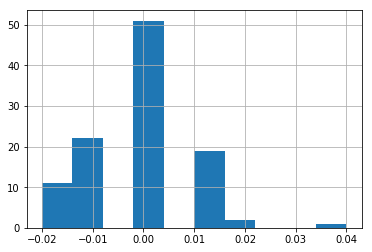

In [130]:
def get_epoch_in_given_timezone(date, tz):
    '''
        Get the epoch of given date in given timezone
    '''
    assert tz in all_timezones
    epoch = int(datetime.datetime.strptime(date, '%d/%m/%Y').timestamp())
    #Add additional time from the UTC
    dt = datetime.datetime.now(timezone('UTC'))
    return epoch + dt.astimezone(timezone(tz)).utcoffset().seconds



def convert_query_param_as_url(queryParams):
    url = "?"
    for key,value in queryParams.items():
        url += key + "=" + str(value) + "&"
    return url

def generateRequest(method, url, headers,body):
    return requests.request(method, url, headers=headers, data = json.dumps(body))
    

def isRequestSuccess(statusCode):
    return statusCode in [200,201,202,204]

def getFileName(headers):
    return headers['content-disposition'].split(';')[1].split('=')[1]

def downloadFile(url):
    response = generateRequest("GET", url, dict(), dict())
    assert isRequestSuccess(response.status_code)
    
    fileName = getFileName(response.headers)
    
    content = response.content
    csv_file = open(fileName, 'wb')
    csv_file.write(content)
    csv_file.close()
    
    return fileName
    
def interpret_stock_data(fileName):
    df = pd.read_csv(fileName)
    df['return'] = ((df['Close'] - df['Open'])/df['Open']).round(2)
    df['return'].hist()

def analyse_stock_data(symbol, startDate, endDate, timeZone, interval = '1d'):
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + symbol
    
    queryParams = dict()
    queryParams['period1'] = get_epoch_in_given_timezone(startDate, timeZone)
    queryParams['period2'] = get_epoch_in_given_timezone(endDate, timeZone)
    queryParams['events'] = 'history'
    queryParams['interval'] = interval
    
    url = url + convert_query_param_as_url(queryParams)
    
    fileName = downloadFile(url)
    interpret_stock_data(fileName)


if __name__ == "__main__":
    timeZone = input('Enter your timezone: ')
    stockName = input('Enter stock name as per yahoo finance: ')
    startDate = input('Enter starting date in DD/MM/YYYY format: ')
    endDate = input('Enter end date in DD/MM/YYYY format: ')
    interval = input('Select interval from [1d, 1wk, 1mo] : ')
    analyse_stock_data(stockName, startDate, endDate, timeZone, interval)